In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
df = pd.read_excel("GooglePlaystore.xlsx")
df.Reviews = pd.to_numeric(df.Reviews[df.Reviews!="3.0M"])
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up


In [22]:
df = df[~(df=="Varies with device").any(axis=1)]

In [23]:
df['Android Ver']=pd.to_numeric(df['Android Ver'].str.strip().str[:3])

In [24]:
df["Installs"] = (df["Installs"].str.replace("+","").str.replace(",",""))
df["Installs"] = pd.to_numeric(df["Installs"][df["Installs"].str.isnumeric()] )

In [25]:
df['Rating'][df["Rating"].isna()] = df['Rating'][df["Rating"].isna()][(df['Reviews']>=100) & (df["Installs"]>=50000)]
df['Rating']= df['Rating'].fillna(round(df["Rating"].mean(),2))

In [26]:
df["Size"] =df["Size"].apply(lambda x: float(x.replace("+","").replace(",","").replace("M","").replace("m",""))*(1000000) if "M" in x.upper() else float(x.replace("+","").replace(",","").replace("k",""))*(1000))

In [27]:
print(df.groupby(by="Category").agg(["count","mean","std"])["Rating"])

                     count       mean       std
Category                                       
1.9                      1  19.000000       NaN
ART_AND_DESIGN          61   4.349344  0.361529
AUTO_AND_VEHICLES       74   4.150541  0.521060
BEAUTY                  47   4.265957  0.331811
BOOKS_AND_REFERENCE    197   4.279746  0.396701
BUSINESS               399   4.138797  0.520446
COMICS                  50   4.154800  0.544727
COMMUNICATION          263   4.115133  0.449785
DATING                 212   3.996840  0.607048
EDUCATION              110   4.390636  0.255279
ENTERTAINMENT           86   4.145349  0.291308
EVENTS                  54   4.367222  0.312841
FAMILY                1822   4.187294  0.483778
FINANCE                304   4.121612  0.635913
FOOD_AND_DRINK         100   4.109200  0.532100
GAME                   996   4.264528  0.371253
HEALTH_AND_FITNESS     261   4.208314  0.639648
HOUSE_AND_HOME          68   4.163824  0.347095
LIBRARIES_AND_DEMO      82   4.195122  0

In [28]:
free = df[df["Type"]=="Free"]

def func(column):
  return free.groupby("Category")[["App",column]].apply(lambda x:x.nlargest(3,columns=column)).reset_index().drop("level_1",axis=1)
print(func("Installs"))

             Category                                                App  \
0      ART_AND_DESIGN                     Tattoo Name On My Photo Editor   
1      ART_AND_DESIGN                                       ibis Paint X   
2      ART_AND_DESIGN  Canva: Poster, banner, card maker & graphic de...   
3   AUTO_AND_VEHICLES                      AutoScout24 - used car finder   
4   AUTO_AND_VEHICLES                        Used cars for sale - Trovit   
..                ...                                                ...   
94      VIDEO_PLAYERS             VivaVideo - Video Editor & Photo Movie   
95      VIDEO_PLAYERS                                           Vote for   
96            WEATHER                 Weather & Clock Widget for Android   
97            WEATHER                   Weather –Simple weather forecast   
98            WEATHER                                            Weather   

       Installs  
0    10000000.0  
1    10000000.0  
2    10000000.0  
3    10000000.0

In [29]:
paid = df[df["Type"]=="Paid"]
print("The min,avg,max price for paid apps are %.2f,%.2f,%.2f"%(paid["Price"].min(),paid["Price"].mean(),paid["Price"].max()))

The min,avg,max price for paid apps are 0.99,15.04,400.00


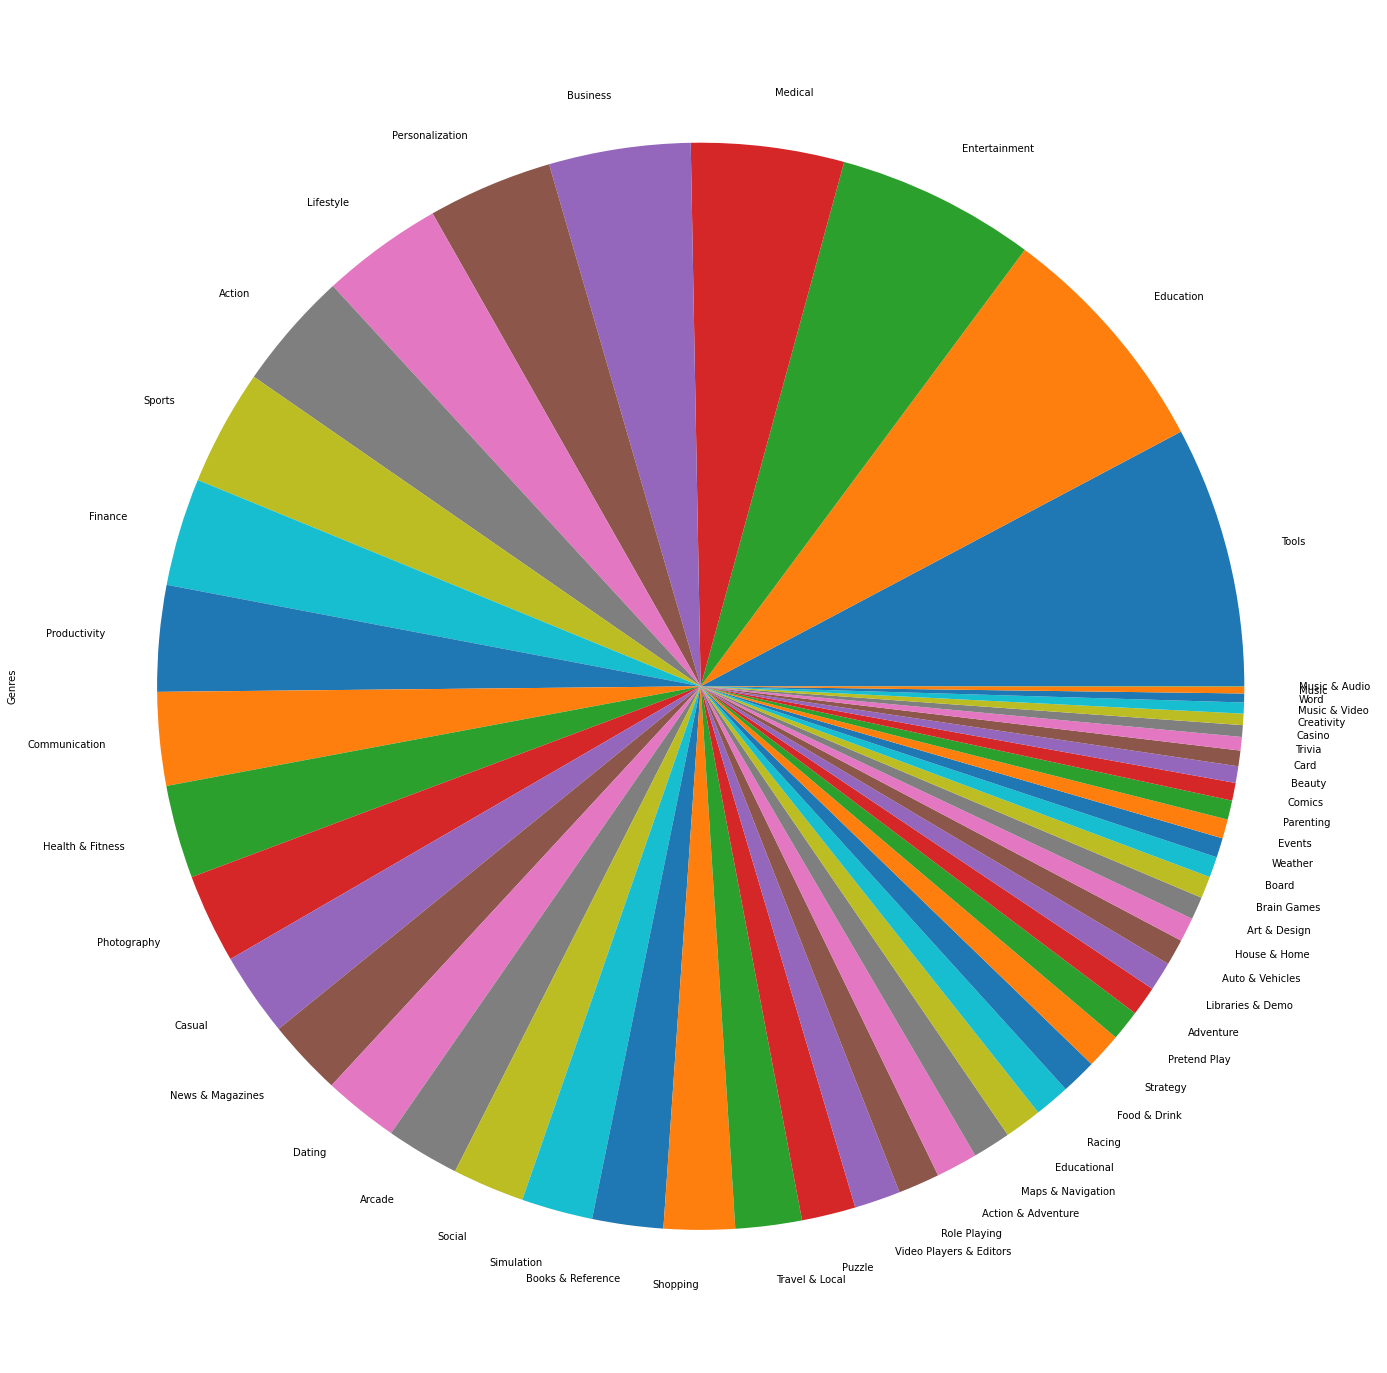

In [30]:
df["Genres"].str.split(";").explode().value_counts().plot(kind="pie",figsize=(25,25))
plt.show()

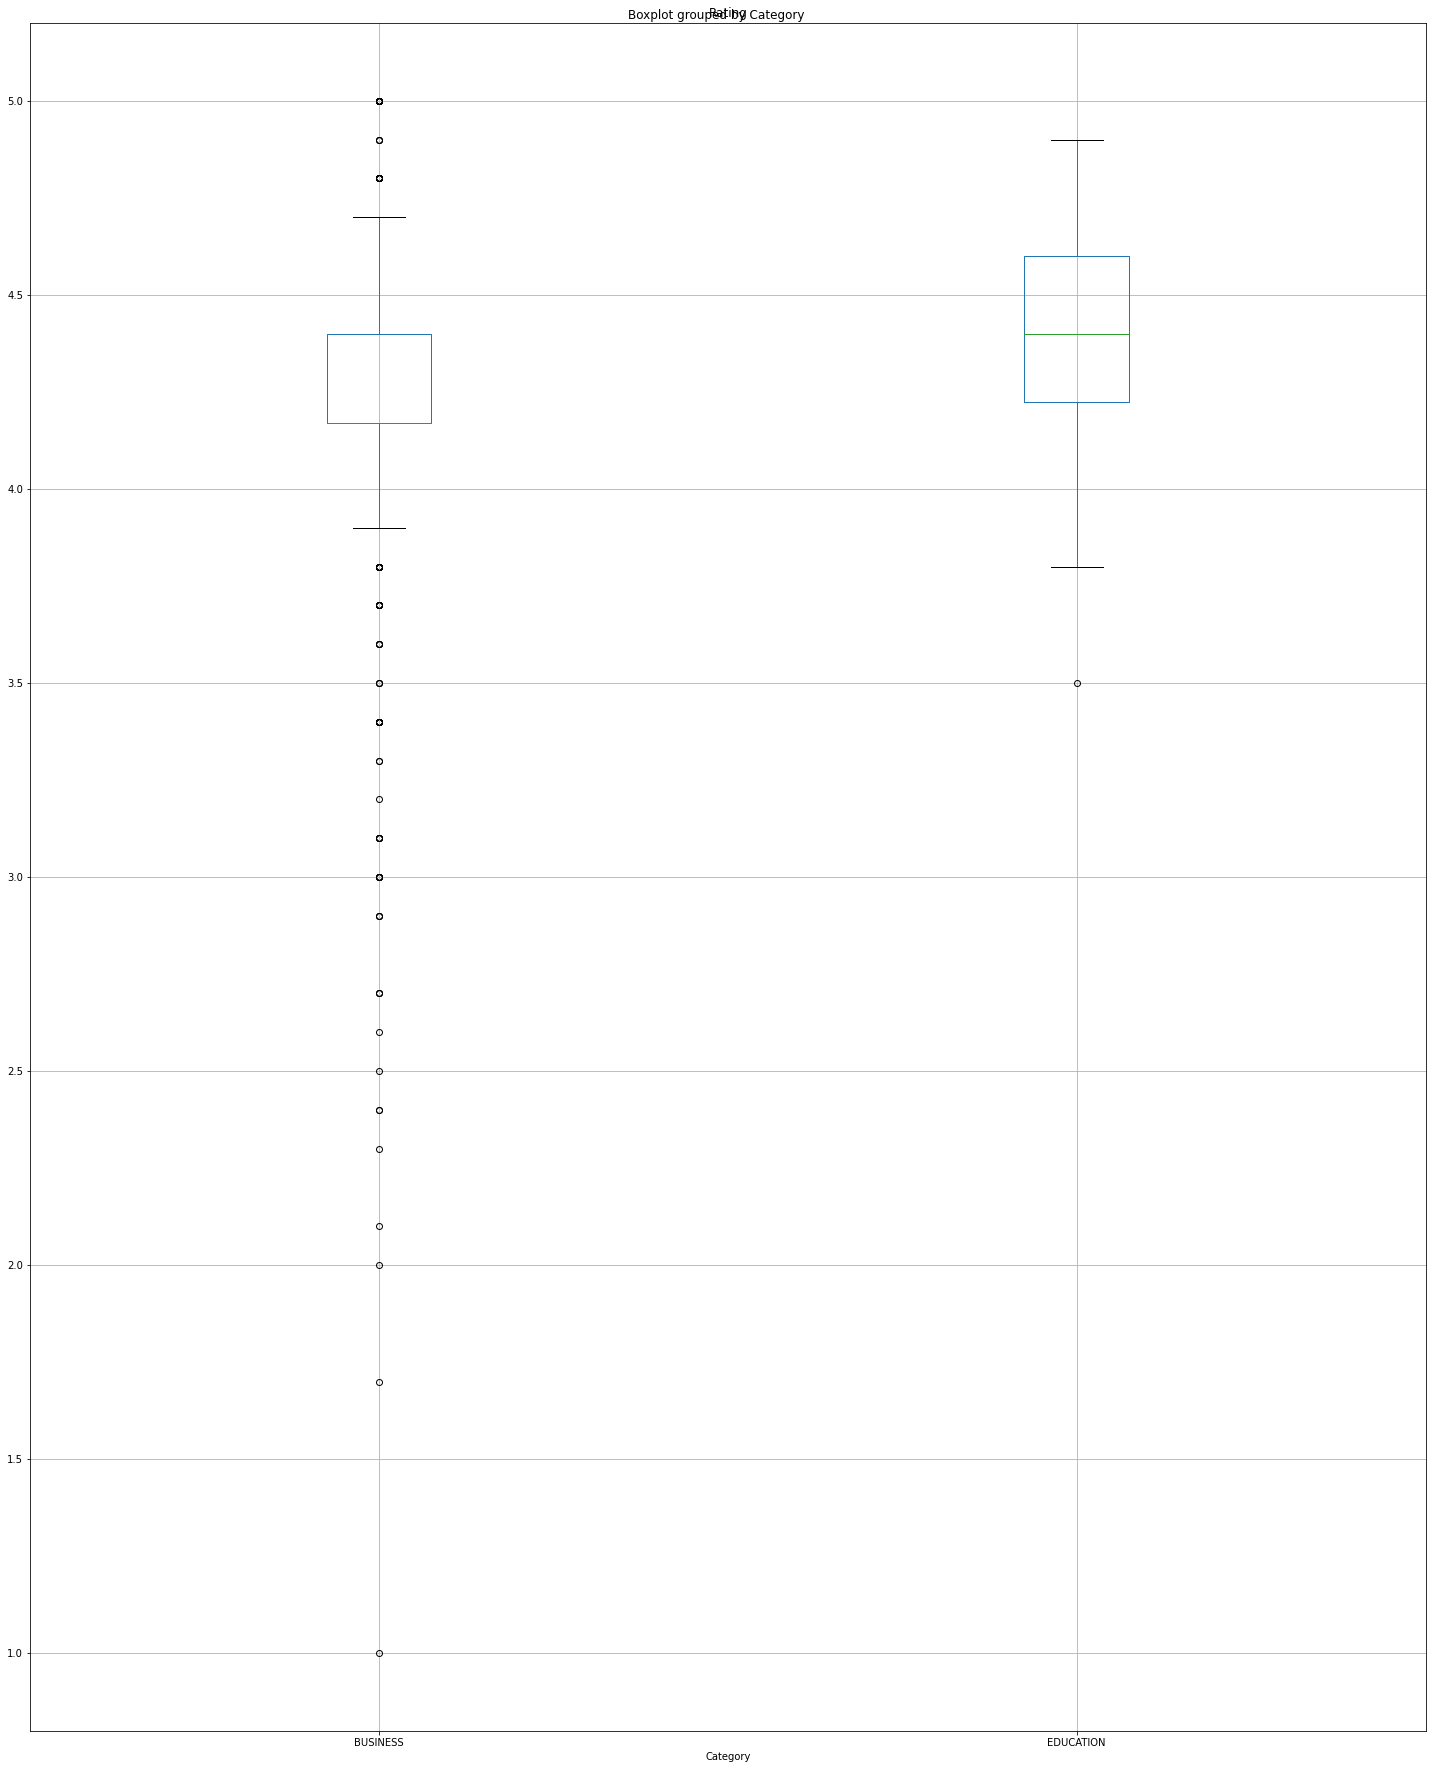

In [31]:
df[(df["Category"]=="BUSINESS") | (df["Category"]=="EDUCATION")].boxplot(column="Rating",by="Category",figsize=(20,25))
plt.tight_layout()
plt.show()